## Imports

In [1]:
import numpy as np
import pandas as pd
import glob
import os
from helpers import *

assert (
    os.getcwd().split("/")[-1] == "HW2"
), "You're working at the wrong directory. Reopen VScode in the folder 'HW2'."

## Convert
Gonna convert the given horribly slow ```xlsx``` format data to ```csv``` format

In [2]:
convert_to_csv()


Saved as: Data/TimeStamp.csv
Saved as: Data/Outdoor_WindSpeed.csv
Saved as: Data/Electric_Energy.csv
Saved as: Data/LivingRoom_Luminance.csv
Saved as: Data/Outdoor_Humidity.csv
Saved as: Data/Outdoor_WindDirection.csv
Saved as: Data/Cooling_Energy.csv
Saved as: Data/LivingRoom_Window1_Opening.csv
Saved as: Data/LivingRoom_Window2_Opening.csv
Saved as: Data/Outdoor_Radiation.csv
Saved as: Data/Heating_Energy.csv
Saved as: Data/LivingRoom_Air_Temperature.csv
Saved as: Data/Outdoor_DryBulb.csv


## Read and describe
Read and concat as ```pd.DataFrame```, no need to deal with each ```pd.Series```

In [3]:
series_list, df = read_describe()

Data/Outdoor_WindSpeed.csv
       Outdoor_WindSpeed
count      525601.000000
mean            1.239541
std             1.032399
min             0.000000
25%             0.600000
50%             0.900000
75%             1.500000
max            10.300000
Data/Electric_Energy.csv
       Electric_Energy
count    525601.000000
mean          0.257175
std           0.367667
min           0.000000
25%           0.156240
50%           0.188370
75%           0.238140
max           8.122590
Data/Outdoor_Radiation.csv
       Outdoor_Radiation
count      525601.000000
mean          143.029465
std           233.765621
min             0.000000
25%             1.000000
50%             4.800000
75%           190.000000
max          1153.000000
Data/TimeStamp.csv
           TimeStamp
count  525601.000000
mean       29.499951
std        17.318138
min         0.000000
25%        14.000000
50%        29.000000
75%        44.000000
max        59.000000
Data/LivingRoom_Window2_Opening.csv
       LivingRoom_Wi

## Cleansing and checking missing values
Check if there're NaNs and fill them with 0

In [4]:
df_fix = cleansing(df)

Found 0 missing values from dataset


## Outlier detection
Detect and clip outlier values based on quantile from range $[0.001, 0.999]$

In [5]:
df_fix = outliers_quantile(df_fix)

[Cooling_Energy] clipping range 0.000~12.788 to 0.001~5.923, processed 390496/525601 outliers
[Electric_Energy] clipping range 0.000~8.123 to 0.113~3.983, processed 1139/525601 outliers
[Heating_Energy] clipping range 0.000~9.819 to 0.001~4.800, processed 343248/525601 outliers
[LivingRoom_Air_Temperature] clipping range 0.000~33.701 to 20.157~31.181, processed 1570/525601 outliers
[LivingRoom_Luminance] clipping range 0.000~57460.200 to 0.000~20250.300, processed 160360/525601 outliers
[LivingRoom_Window1_Opening] clipping range 0.000~1.000 to 0.000~1.000, processed 525601/525601 outliers
[LivingRoom_Window2_Opening] clipping range 0.000~1.000 to 0.000~1.000, processed 525601/525601 outliers
[Outdoor_DryBulb] clipping range -5.300~41.000 to -4.200~38.100, processed 1182/525601 outliers
[Outdoor_Humidity] clipping range 0.000~100.000 to 19.800~99.100, processed 1095/525601 outliers
[Outdoor_Radiation] clipping range 0.000~1153.000 to 0.000~961.600, processed 25517/525601 outliers
[Outd

## Log transformation
For non-logit columns with pre-log values $0$, clip post-log value ```-inf``` to the second-smallest value  
For logit columns which has $0$ and $1$ only, clip post-log value ```-inf``` to $-1$  
to avoid NaNs.

In [6]:
df_fix_log = log_transformation(df_fix)
print(df_fix.describe())
print(df_fix_log.describe())


       Cooling_Energy  Electric_Energy  Heating_Energy  \
count   525601.000000    525601.000000   525601.000000   
mean         0.436489         0.256421        0.435162   
std          0.854206         0.357638        0.809121   
min          0.001000         0.112770        0.001000   
25%          0.001000         0.156240        0.001000   
50%          0.001000         0.188370        0.001000   
75%          0.292000         0.238140        0.635000   
max          5.923000         3.983490        4.800000   

       LivingRoom_Air_Temperature  LivingRoom_Luminance  \
count               525601.000000         525601.000000   
mean                    23.530856            905.786773   
std                      1.542182           1639.757124   
min                     20.157500              0.000000   
25%                     22.519700              0.000000   
50%                     23.149600            127.262000   
75%                     24.409400           1170.080000   
max  

## Evaluate normality
Using Shapiro-Wilk test method, determined to be normal if $p \geq 0.05$

In [7]:
normality_test(df_fix)
normality_test(df_fix_log)

(NOT normal)Cooling_Energy: 0.0000e+00
(NOT normal)Electric_Energy: 0.0000e+00
(NOT normal)Heating_Energy: 0.0000e+00
(NOT normal)LivingRoom_Air_Temperature: 0.0000e+00
(NOT normal)LivingRoom_Luminance: 0.0000e+00
(NOT normal)LivingRoom_Window1_Opening: 0.0000e+00
(NOT normal)LivingRoom_Window2_Opening: 0.0000e+00
(NOT normal)Outdoor_DryBulb: 0.0000e+00
(NOT normal)Outdoor_Humidity: 0.0000e+00
(NOT normal)Outdoor_Radiation: 0.0000e+00
(NOT normal)Outdoor_WindDirection: 0.0000e+00
(NOT normal)Outdoor_WindSpeed: 0.0000e+00
(NOT normal)TimeStamp: 0.0000e+00
(Normal)Arbitrary np.randn: 1.0000e+00
(NOT normal)Cooling_Energy: 0.0000e+00
(NOT normal)Electric_Energy: 0.0000e+00
(NOT normal)Heating_Energy: 0.0000e+00
(NOT normal)LivingRoom_Air_Temperature: 0.0000e+00
(NOT normal)LivingRoom_Luminance: 0.0000e+00
(NOT normal)LivingRoom_Window1_Opening: 0.0000e+00
(NOT normal)LivingRoom_Window2_Opening: 0.0000e+00
(Normal)Outdoor_DryBulb: 1.0000e+00
(NOT normal)Outdoor_Humidity: 0.0000e+00
(NOT no

## Cross and auto-correlations
Standardize data by ```stdize(df)```
- Linearity measured by Pearson correlation  
- Monotonicity measure by Spearman correlation

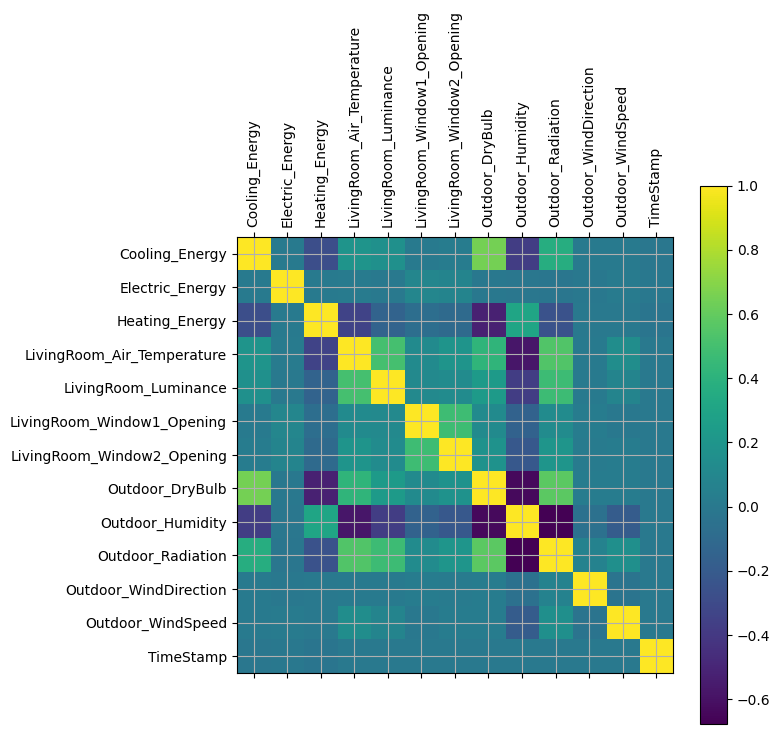

[[ 1.     0.016 -0.274  0.19   0.165  0.017  0.025  0.651 -0.374  0.369
   0.006  0.016 -0.01 ]
 [ 0.016  1.     0.01   0.02   0.001  0.094  0.08  -0.007 -0.014 -0.017
  -0.005  0.022 -0.003]
 [-0.274  0.01   1.    -0.342 -0.145 -0.073 -0.094 -0.521  0.307 -0.254
  -0.001  0.002 -0.023]
 [ 0.19   0.02  -0.342  1.     0.506  0.125  0.191  0.419 -0.576  0.542
   0.009  0.145  0.   ]
 [ 0.165  0.001 -0.145  0.506  1.     0.111  0.132  0.236 -0.373  0.476
   0.007  0.081 -0.002]
 [ 0.017  0.094 -0.073  0.125  0.111  1.     0.476  0.123 -0.151  0.134
   0.024 -0.008 -0.001]
 [ 0.025  0.08  -0.094  0.191  0.132  0.476  1.     0.175 -0.213  0.195
   0.022  0.026 -0.001]
 [ 0.651 -0.007 -0.521  0.419  0.236  0.123  0.175  1.    -0.638  0.576
   0.026  0.03  -0.   ]
 [-0.374 -0.014  0.307 -0.576 -0.373 -0.151 -0.213 -0.638  1.    -0.677
  -0.053 -0.188  0.001]
 [ 0.369 -0.017 -0.254  0.542  0.476  0.134  0.195  0.576 -0.677  1.
   0.067  0.156  0.   ]
 [ 0.006 -0.005 -0.001  0.009  0.007  0.024

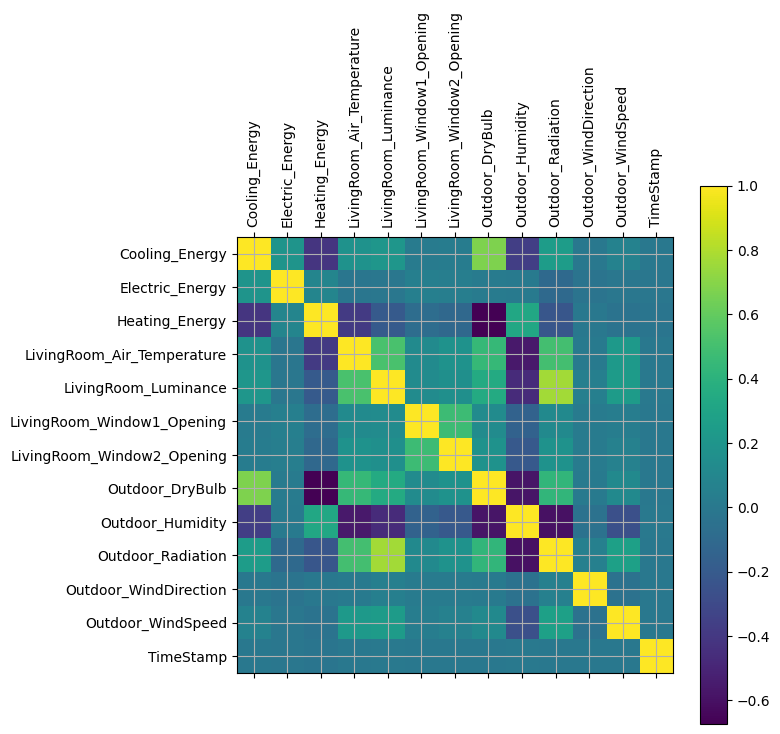

[[ 1.     0.195 -0.412  0.179  0.208  0.02   0.03   0.675 -0.362  0.248
  -0.001  0.067 -0.006]
 [ 0.195  1.     0.091 -0.014 -0.009  0.052  0.04   0.02   0.017 -0.098
  -0.026 -0.01  -0.012]
 [-0.412  0.091  1.    -0.391 -0.197 -0.077 -0.107 -0.673  0.329 -0.225
  -0.006 -0.038 -0.021]
 [ 0.179 -0.014 -0.391  1.     0.52   0.13   0.181  0.445 -0.556  0.499
   0.008  0.235 -0.   ]
 [ 0.208 -0.009 -0.197  0.52   1.     0.134  0.162  0.349 -0.467  0.771
   0.047  0.248  0.   ]
 [ 0.02   0.052 -0.077  0.13   0.134  1.     0.476  0.133 -0.148  0.123
   0.022  0.035 -0.001]
 [ 0.03   0.04  -0.107  0.181  0.162  0.476  1.     0.182 -0.205  0.18
   0.02   0.061 -0.001]
 [ 0.675  0.02  -0.673  0.445  0.349  0.133  0.182  1.    -0.577  0.429
   0.014  0.123 -0.   ]
 [-0.362  0.017  0.329 -0.556 -0.467 -0.148 -0.205 -0.577  1.    -0.6
  -0.039 -0.266  0.001]
 [ 0.248 -0.098 -0.225  0.499  0.771  0.123  0.18   0.429 -0.6    1.
   0.057  0.275  0.   ]
 [-0.001 -0.026 -0.006  0.008  0.047  0.022  0

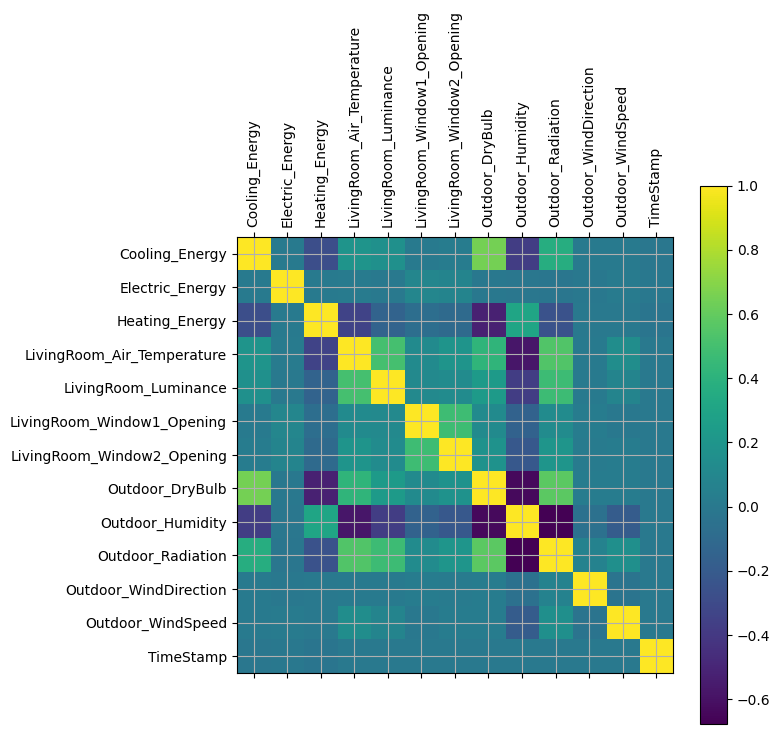

[[ 1.     0.016 -0.274  0.19   0.165  0.017  0.025  0.651 -0.374  0.369
   0.006  0.016 -0.01 ]
 [ 0.016  1.     0.01   0.02   0.001  0.094  0.08  -0.007 -0.014 -0.017
  -0.005  0.022 -0.003]
 [-0.274  0.01   1.    -0.342 -0.145 -0.073 -0.094 -0.521  0.307 -0.254
  -0.001  0.002 -0.023]
 [ 0.19   0.02  -0.342  1.     0.506  0.125  0.191  0.419 -0.576  0.542
   0.009  0.145  0.   ]
 [ 0.165  0.001 -0.145  0.506  1.     0.111  0.132  0.236 -0.373  0.476
   0.007  0.081 -0.002]
 [ 0.017  0.094 -0.073  0.125  0.111  1.     0.476  0.123 -0.151  0.134
   0.024 -0.008 -0.001]
 [ 0.025  0.08  -0.094  0.191  0.132  0.476  1.     0.175 -0.213  0.195
   0.022  0.026 -0.001]
 [ 0.651 -0.007 -0.521  0.419  0.236  0.123  0.175  1.    -0.638  0.576
   0.026  0.03  -0.   ]
 [-0.374 -0.014  0.307 -0.576 -0.373 -0.151 -0.213 -0.638  1.    -0.677
  -0.053 -0.188  0.001]
 [ 0.369 -0.017 -0.254  0.542  0.476  0.134  0.195  0.576 -0.677  1.
   0.067  0.156  0.   ]
 [ 0.006 -0.005 -0.001  0.009  0.007  0.024

In [8]:
pearson = pearson_corr(stdize(df_fix))
visualize_corr(pearson, df_fix)


spearman = spearman_corr(stdize(df_fix))
visualize_corr(spearman, df_fix)

cov = np.cov(stdize(df_fix).T)
visualize_corr(cov, df_fix)